In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_df = pd.read_csv('./data/train_users_2.csv')
test_df = pd.read_csv('./data/test_users.csv')

In [3]:
train_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [4]:
train_df.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

### Feature Enginnering Flow
1. datetime
2. age
3. categorical
    - One-hot encoding
        - ```pd.get_dummies()```
4. remove NaN 많은 column
    - drop

## 0. dtype transform

### 0.1. Datetime

In [5]:
train_df['date_account_created'] = pd.to_datetime(train_df.date_account_created)
test_df['date_account_created'] = pd.to_datetime(test_df.date_account_created)

In [6]:
tr_tfa_str = train_df.timestamp_first_active.values.astype('str')
train_df['timestamp_first_active'] = pd.to_datetime(tr_tfa_str)
te_tfa_str = test_df.timestamp_first_active.values.astype('str')
test_df['timestamp_first_active'] = pd.to_datetime(te_tfa_str)

### 0.2. Drop NaN columns

In [7]:
train_df.drop(['date_first_booking','country_destination'],axis=1, inplace=True)
test_df.drop(['date_first_booking'],axis=1, inplace=True)

### 0.3. Concat train_df & test_df

In [8]:
df = pd.concat([train_df,test_df],axis=0,ignore_index=True)
df.shape

(275547, 14)

## 1. Datetime --- One-hot Encoding

### 1.1 timestamp_first_active

In [9]:
df['tfa_year'] = np.array([x.year for x in df.timestamp_first_active])
df['tfa_month'] = np.array([x.month for x in df.timestamp_first_active])
df['tfa_day'] = np.array([x.day for x in df.timestamp_first_active])

In [10]:
df['tfa_wd'] = np.array([x.isoweekday() for x in df.timestamp_first_active])
# return weekdays as 1,2,3,4,5,6,7 = mon ~ sun
tfa_wd_df = pd.get_dummies(df.tfa_wd, prefix='tfa_wd')
# return a dataframe 
df = pd.concat((df,tfa_wd_df),axis=1)
# new df = previous df + onhot-encoding df
df.drop(['tfa_wd'], axis=1, inplace=True)
# remove tfa_wd column, use onehot-encoded feature columns

In [11]:
def season(tfa):
    month = tfa.month
    if month in [3,4,5]:
        label = 'Spring'
    elif month in [6,7,8]:
        label = 'Summer'
    elif month in [9,10,11]:
        label = 'Autumn'
    else: label = 'Winter'
    return label   
    
df['tfa_season'] = df.timestamp_first_active.apply(season)
tfa_season_df = pd.get_dummies(df.tfa_season, prefix='tfa_season')
df = pd.concat((df, tfa_season_df),axis=1)
df.drop(['tfa_season'],axis=1,inplace=True)

### 1.2 date_account_created

In [12]:
df['dac_year'] = np.array([x.year for x in df.date_account_created])
df['dac_month'] = np.array([x.month for x in df.date_account_created])
df['dac_day'] = np.array([x.day for x in df.date_account_created])

In [13]:
df['dac_wd'] = np.array([x.isoweekday() for x in df.date_account_created])
dac_wd_df = pd.get_dummies(df.dac_wd, prefix='dac_wd')
df = pd.concat((df,dac_wd_df),axis=1)
df.drop(['dac_wd'],axis=1,inplace=True)

In [14]:
df['dac_season'] = df.date_account_created.apply(season)
dac_season_df = pd.get_dummies(df.dac_season,prefix='dac_season')
df = pd.concat((df,dac_season_df),axis=1)
df.drop(['dac_season'],axis=1,inplace=True)

In [15]:
df.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,dac_wd_2,dac_wd_3,dac_wd_4,dac_wd_5,dac_wd_6,dac_wd_7,dac_season_Autumn,dac_season_Spring,dac_season_Summer,dac_season_Winter
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,-unknown-,NaN,facebook,0,en,direct,direct,...,0,0,0,0,0,0,0,0,1,0
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,MALE,38.0,facebook,0,en,seo,google,...,0,1,0,0,0,0,0,1,0,0
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,FEMALE,56.0,basic,3,en,direct,direct,...,1,0,0,0,0,0,1,0,0,0
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,FEMALE,42.0,facebook,0,en,direct,direct,...,0,0,0,0,0,0,0,0,0,1
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,-unknown-,41.0,basic,0,en,direct,direct,...,1,0,0,0,0,0,1,0,0,0


In [16]:
df.columns

Index(['id', 'date_account_created', 'timestamp_first_active', 'gender', 'age',
       'signup_method', 'signup_flow', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser', 'tfa_year', 'tfa_month',
       'tfa_day', 'tfa_wd_1', 'tfa_wd_2', 'tfa_wd_3', 'tfa_wd_4', 'tfa_wd_5',
       'tfa_wd_6', 'tfa_wd_7', 'tfa_season_Autumn', 'tfa_season_Spring',
       'tfa_season_Summer', 'tfa_season_Winter', 'dac_year', 'dac_month',
       'dac_day', 'dac_wd_1', 'dac_wd_2', 'dac_wd_3', 'dac_wd_4', 'dac_wd_5',
       'dac_wd_6', 'dac_wd_7', 'dac_season_Autumn', 'dac_season_Spring',
       'dac_season_Summer', 'dac_season_Winter'],
      dtype='object')

### 1.3 Time Span between dac and tfa

In [17]:
# Series.dt.day -> The days of the datetime

In [18]:
dt_span = df.date_account_created.subtract(df.timestamp_first_active).dt.days

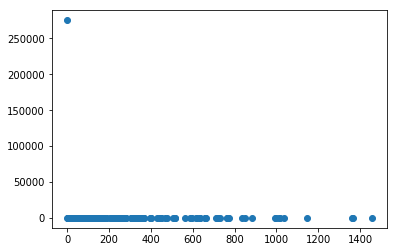

In [19]:
plt.scatter(dt_span.value_counts().index, dt_span.value_counts().values)

In [20]:
def time_span(var):
    if var == -1:
        label = 'Oneday'
    elif var <= 30:
        label = 'Onemonth'
    elif var <= 365:
        label = 'Oneyear'
    else: label = 'Other'
    return label

time_span_label = dt_span.apply(time_span)

In [21]:
time_span_label.value_counts()

Oneday      275369
Oneyear         88
Other           47
Onemonth        43
dtype: int64

In [22]:
df['time_span'] = time_span_label

In [23]:
time_span_df = pd.get_dummies(df.time_span, prefix='time_span')
df = pd.concat((df,time_span_df),axis=1)
df.drop(['time_span'],axis=1,inplace=True)

### 1.4 Remove dac & tfa columns after feature enginnering

In [24]:
df.drop(['date_account_created','timestamp_first_active'],axis=1,inplace=True)

## 2.  Age --- One-hot Encoding

In [86]:
df.head()

,id,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,...,True_Oneyear,True_Other,time_span_Oneday,time_span_Onemonth,time_span_Oneyear,time_span_Other,time_span_Oneday,time_span_Onemonth,time_span_Oneyear,time_span_Other
0,gxn3p5htnn,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,...,0,1,0,0,0,1,0,0,0,1
1,820tgsjxq7,MALE,38.0,facebook,0,en,seo,google,untracked,Web,...,0,1,0,0,0,1,0,0,0,1
2,4ft3gnwmtx,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,...,0,1,0,0,0,1,0,0,0,1
3,bjjt8pjhuk,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,...,0,1,0,0,0,1,0,0,0,1
4,87mebub9p4,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,...,1,0,0,0,1,0,0,0,1,0


In [1]:
df.age.fillna(-1,inplace=True)

NameError: name 'df' is not defined

0          NaN
1         38.0
2         56.0
3         42.0
4         41.0
5          NaN
6         46.0
7         47.0
8         50.0
9         46.0
10        36.0
11        47.0
12         NaN
13        37.0
14        36.0
15        33.0
16         NaN
17        31.0
18         NaN
19        29.0
20         NaN
21        30.0
22        40.0
23         NaN
24        40.0
25        26.0
26         NaN
27        32.0
28        35.0
29        37.0
          ... 
275517     NaN
275518    48.0
275519     NaN
275520    24.0
275521    32.0
275522     NaN
275523     NaN
275524     NaN
275525     NaN
275526    40.0
275527    39.0
275528     NaN
275529     NaN
275530    44.0
275531    39.0
275532    34.0
275533     NaN
275534    40.0
275535    27.0
275536    24.0
275537     NaN
275538    55.0
275539    34.0
275540    32.0
275541     NaN
275542    31.0
275543     NaN
275544     NaN
275545     NaN
275546    49.0
Name: age, Length: 275547, dtype: float64